# Vaccination coverage by socioeconomic score

In [1]:
import pandas as pd
import numpy as np
import model
from matplotlib import pyplot as plt
%matplotlib inline

Load demographic data

In [2]:
dem = pd.read_csv('../../Data/vaccination_data/sample_dem_data.txt').iloc[:,1:].copy()
dem.head(1)

,random_ID,registration_date,customer_situation,birth_year,male/female,stat_code,stat_desc,doctors_ID,doctors_random_ID,Lamas_socioeconomic_score,Points_socioeconomic_score,Points_AGAS_code,country_of_origin_code,country_of_origin_desc,date_of_immigration
0,511590,1967-02-01 00:00:00.000,1,1937,ז,4407,רמת-גן,54045588,54043622,15,9,86000112,4,ישראל,1900-01-01 00:00:00.000


In [3]:
socioeco_scores = dem[['random_ID', 'Lamas_socioeconomic_score']].copy()
socioeco_scores.columns = ['random_ID', 'socioeconomic_score']
socioeco_scores.head()

,random_ID,socioeconomic_score
0,511590,15
1,2472867,6
2,2994876,14
3,257344,17
4,979247,15


In [4]:
pop_by_score = socioeco_scores.socioeconomic_score.value_counts().sort_index()
pop_by_score

0     22028
1        20
2      3149
3      3176
4      8235
5      9424
6     10511
7     11192
8      9266
9     12771
10    19435
11    24031
12    23283
13    22700
14    18373
15    13528
16    11636
17    12665
18     6713
19     6398
20     1466
Name: socioeconomic_score, dtype: int64

In [5]:
socioeco_scores[socioeco_scores.socioeconomic_score == 0].shape[0]

22028

Load vaccination data

In [6]:
prep_data = model.data_and_network_prep()

In [7]:
vacc_data = prep_data['vaccination_data'].copy()
vacc_data.head(1)

,random_ID,birth_year,vac_season,vac_date,vac_day_of_season,clinic_code,stat_area_id,age
0,63,1945,2008,2007-10-24,145,6613,265023,1


Merge

In [8]:
vacc_data = vacc_data.merge(socioeco_scores, on='random_ID')

In [9]:
vacc_data.head()

,random_ID,birth_year,vac_season,vac_date,vac_day_of_season,clinic_code,stat_area_id,age,socioeconomic_score
0,63,1945,2008,2007-10-24,145,6613,265023,1,19
1,63,1945,2009,2008-10-23,144,6613,265023,1,19
2,63,1945,2010,2009-11-02,154,6613,265023,1,19
3,63,1945,2011,2010-11-01,153,6613,265023,1,19
4,63,1945,2012,2011-11-03,155,6613,265023,1,19


In [10]:
# Group by socioeconomic score and count unmber of vaccinated season
vacc_data_gb = vacc_data[vacc_data.vac_season.isin(model.seasons)].groupby('socioeconomic_score')[['vac_season']]
vacc_cov_by_score = vacc_data_gb.count()

# Calculate average vaccination coverage by deviding by 
vacc_cov_by_score /= 7*pop_by_score.values.reshape(21,1)
vacc_cov_by_score = vacc_cov_by_score[1:].copy()
vacc_cov_by_score.columns = ['avg_cov']

# Calculate std
vacc_cov_by_score['error'] = vacc_data_gb.std()/np.sqrt((7*pop_by_score.values.reshape(21,1)))
vacc_cov_by_score

,avg_cov,error
socioeconomic_score,,
1,0.092857,0.187034
2,0.094815,0.012872
3,0.102105,0.012681
4,0.094978,0.008027
5,0.098245,0.007601
6,0.137244,0.007185
7,0.163688,0.006908
8,0.166985,0.007574
9,0.171135,0.006425


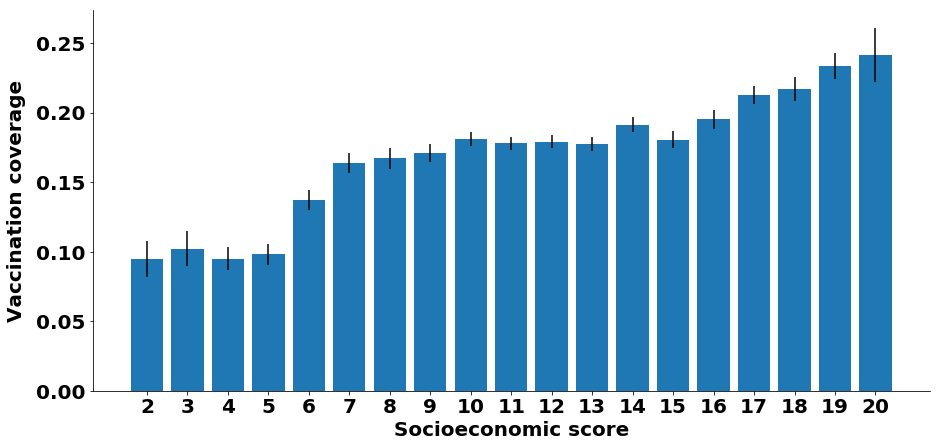

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(range(19), vacc_cov_by_score.avg_cov[1:], yerr=vacc_cov_by_score.error[1:])

# plt.title('Vaccination Coverage by Socio-economic Score (2010-2018)', size=18)
plt.xlabel('Socioeconomic score', size=20, fontweight='bold')
plt.ylabel('Vaccination coverage', size=20, fontweight='bold', labelpad=10)
plt.xticks(np.arange(19), np.arange(2,20+1), fontsize=20, fontweight='bold')
plt.yticks(np.arange(0,0.25+0.05,0.05), fontsize=20, fontweight='bold')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()